# Online Retail II - Assignment 01 - Machine Learning Analysis




**Student:** Rellika Kisyula  
**Date:** November 6, 2025  

---

## Data Overview

**Dataset Source:** [UCI Online Retail II](https://archive.ics.uci.edu/ml/datasets/Online+Retail+II)

### 2.1 Dataset Overview

The **Online Retail II** dataset contains transactional data from a UK-based online retailer specializing in gift and home products. The data covers transactions from **December 2009 to December 2011**.

### Data Dictionary

| Variable      | Type        | Description                        | Business Meaning                           |
|---------------|-------------|------------------------------------|--------------------------------------------|
| `InvoiceNo`     | Categorical | Transaction number                 | Unique sale transaction ID                 |
| `StockCode`     | Categorical | Product code                       | Unique identifier for each product         |
| `Description`   | Text        | Product name                       | Product details for analysis               |
| `Quantity`      | Numeric     | Units purchased                    | Measures demand volume                     |
| `InvoiceDate`   | Datetime    | Date and time of transaction       | Used for trend, seasonality, and recency   |
| `Price`     | Numeric     | Price per unit (in GBP)            | Indicates pricing strategy                 |
| `Customer ID`    | Categorical | Unique customer identifier         | Enables customer segmentation & prediction |
| `Country`       | Categorical | Country of customer                | Geographic market analysis                 |

---

## 1. Data Acquisition and Loading

In [1]:
# important libraries to install
# !pip install pyjanitor plotnine pandas matplotlib numpy openpyxl pyarrow

In [58]:
import matplotlib.pyplot as plt
# Import required libraries
import pandas as pd
import numpy as np
import warnings
from plotnine import *
import seaborn as sns
warnings.filterwarnings('ignore')

# Display settings
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.float_format', '{:.2f}'.format)

In [59]:
def read_retail_data():
    # Load the dataset from both sheets
    file_path = "data/online_retail_II.xlsx"

    print("Loading data from both sheets...")
    print("=" * 60)

    # Read Year 2009-2010 sheet
    df_2009_2010 = pd.read_excel(file_path, sheet_name='Year 2009-2010')
    print(f"Year 2009-2010 Sheet: {df_2009_2010.shape[0]:,} rows")

    # Read Year 2010-2011 sheet
    df_2010_2011 = pd.read_excel(file_path, sheet_name='Year 2010-2011')
    print(f"Year 2010-2011 Sheet: {df_2010_2011.shape[0]:,} rows")

    # Combine both sheets
    df = pd.concat([df_2009_2010, df_2010_2011], ignore_index=True)

    print("=" * 60)
    print(f"\nCombined Dataset Shape: {df.shape}")
    print(f"Total Transactions: {df.shape[0]:,}")
    print(f"Total Features: {df.shape[1]}")
    print(f"\nDate Range: {df['InvoiceDate'].min()} to {df['InvoiceDate'].max()}")
    return df.to_csv("data/online_retail_II_combined.csv", index=False)

# Load the data
# df = read_retail_data()

In [60]:
# Load from CSV for faster access in future
original_df = pd.read_csv("data/online_retail_II_combined.csv", parse_dates=['InvoiceDate'])

In [61]:
df = original_df.copy()

---

## 2. Dataset Description and Exploration

### 2.1 Initial Exploration

In [62]:
# Display first few rows
df.head(10)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.00,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.00,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.00,United Kingdom
5,489434,22064,PINK DOUGHNUT TRINKET POT,24,2009-12-01 07:45:00,1.65,13085.00,United Kingdom
6,489434,21871,SAVE THE PLANET MUG,24,2009-12-01 07:45:00,1.25,13085.00,United Kingdom
7,489434,21523,FANCY FONT HOME SWEET HOME DOORMAT,10,2009-12-01 07:45:00,5.95,13085.00,United Kingdom
8,489435,22350,CAT BOWL,12,2009-12-01 07:46:00,2.55,13085.00,United Kingdom
9,489435,22349,"DOG BOWL , CHASING BALL DESIGN",12,2009-12-01 07:46:00,3.75,13085.00,United Kingdom


In [63]:
# Dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067371 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype         
---  ------       --------------    -----         
 0   Invoice      1067371 non-null  object        
 1   StockCode    1067371 non-null  object        
 2   Description  1062989 non-null  object        
 3   Quantity     1067371 non-null  int64         
 4   InvoiceDate  1067371 non-null  datetime64[ns]
 5   Price        1067371 non-null  float64       
 6   Customer ID  824364 non-null   float64       
 7   Country      1067371 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 65.1+ MB


### 2.2 Dataset Statistics

In [64]:
# Summary statistics for numeric columns
df[['Quantity', 'Price']].describe().T

,count,mean,std,min,25%,50%,75%,max
Quantity,1067371.00,9.94,172.71,-80995.00,1.00,3.00,10.00,80995.00
Price,1067371.00,4.65,123.55,-53594.36,1.25,2.10,4.15,38970.00


In [65]:
# Check missing values
missing_data = df.isnull().sum().sort_values(ascending=False)
missing_percent = (df.isnull().sum() / len(df) * 100).sort_values(ascending=False)

missing_summary = pd.DataFrame({
    'Missing Count': missing_data,
    'Percentage': missing_percent
})

print("\nMissing Values Summary:")
missing_summary[missing_summary['Missing Count'] > 0]


Missing Values Summary:


,Missing Count,Percentage
Customer ID,243007,22.77
Description,4382,0.41


### 2.3 Key Observations

**Data Quality Issues:**
- ~22% of records are missing CustomerID (likely guest purchases)
- Small percentage missing Description
- Negative values in Quantity and UnitPrice indicate returns/cancellations

**Data Characteristics:**
- Over 1 million transactions from multiple countries
- Wide range of products (gift items, home décor)
- Time span covers 2 years of business operations

In [66]:
# Check for unique values in categorical columns
print("Unique Values:")
print(f"  Unique Invoices: {df['Invoice'].nunique():,}")
print(f"  Unique Products: {df['StockCode'].nunique():,}")
print(f"  Unique Customers: {df['Customer ID'].nunique():,}")
print(f"  Countries: {df['Country'].nunique()}")
print(f"\nDate Range: {df['InvoiceDate'].min()} to {df['InvoiceDate'].max()}")

Unique Values:
  Unique Invoices: 53,628
  Unique Products: 5,305
  Unique Customers: 5,942
  Countries: 43

Date Range: 2009-12-01 07:45:00 to 2011-12-09 12:50:00


In [67]:
# Top 10 countries by transaction count
print("Top 10 Countries by Transaction Count:")
df['Country'].value_counts().head(10)

Top 10 Countries by Transaction Count:


Country
United Kingdom    981330
EIRE               17866
Germany            17624
France             14330
Netherlands         5140
Spain               3811
Switzerland         3189
Belgium             3123
Portugal            2620
Australia           1913
Name: count, dtype: int64

---

## Business Problem 1: Revenue Prediction - **What factors drive total transaction revenue?**
Business Context
Management wants to understand which aspects of an order (`product` `quantity`, `pricing`, `timing`, `customer type`, `geography`) most strongly affect how much money a single transaction generates.


#### Variables
1. **Dependent Variable (DV):** Total Revenue per transaction (`Revenue = Quantity × Price`)
2. **Independent Variables (IVs):**
   - Quantity
   - Price
   - Month (from InvoiceDate)
   - DayOfWeek
   - Country
   - CustomerType (New vs Returning)
3. **Model Type:** Regression (start with Linear Regression, then try Random Forest Regressor)
4. **Success Metric:** Good R Squared, Low MAE

---


## Business Problem 2: Customer Repurchase Prediction - **Which factors increase the likelihood of a customer making repeat purchases?**
Customer retention is significantly more cost-effective than acquisition. Marketing wants to identify which customers are likely to buy again so they can:


### Variables
1. **Dependent Variable (DV):** `IsRepeatCustomer` (1 if customer has >1 transaction, 0 otherwise)
2. **Independent Variables (IVs):**
   - RecencyDays (days since last purchase)
   - AvgBasketValue (average spending per transaction)
   - TotalQuantity (total items purchased)
   - TotalRevenue (lifetime customer value)
   - Country
   - MonthOfLastPurchase
3. **Model Type:** Binary Classification (start with Logistic Regression, then try Random Forest Classifier)
4. **Success Metric:** Accuracy ≥ 75%, AUC-ROC ≥ 0.85


---

##  Exploratory Data Analysis (EDA)

### A.  Dataset Preparation for EDA


In [68]:
## use janitor to clean column names
# !pip install pyjanitor
import janitor
df = df.clean_names()

# rename invoicedaate to invoice_date
df = df.rename(columns={'invoicedate': 'invoice_date'})

# customer_id is category column
df['customer_id'] = df['customer_id'].astype('category')
# trim whitespace from description
df['description'] = df['description'].str.strip()

df.head()

,invoice,stockcode,description,quantity,invoice_date,price,customer_id,country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.00,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.00,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.00,United Kingdom


---
### B. Feature Engineering

In [87]:
# Create Revenue column
df['revenue'] = df['quantity'] * df['price']
# Extract Month and DayOfWeek from InvoiceDate
df['month'] = df['invoice_date'].dt.month_name()
df['day_of_week'] = df['invoice_date'].dt.day_name()
# Create CustomerType column
df['customer_type'] = np.where(df.duplicated(subset=['customer_id'], keep=False), 'Returning', 'New')
df.head()

,invoice,stockcode,description,quantity,invoice_date,price,customer_id,country,revenue,month,day_of_week,customer_type
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.00,United Kingdom,83.40,December,Tuesday,Returning
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom,81.00,December,Tuesday,Returning
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom,81.00,December,Tuesday,Returning
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.00,United Kingdom,100.80,December,Tuesday,Returning
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.00,United Kingdom,30.00,December,Tuesday,Returning


---
### C. EDA Visualizations

1. Revenue Distribution

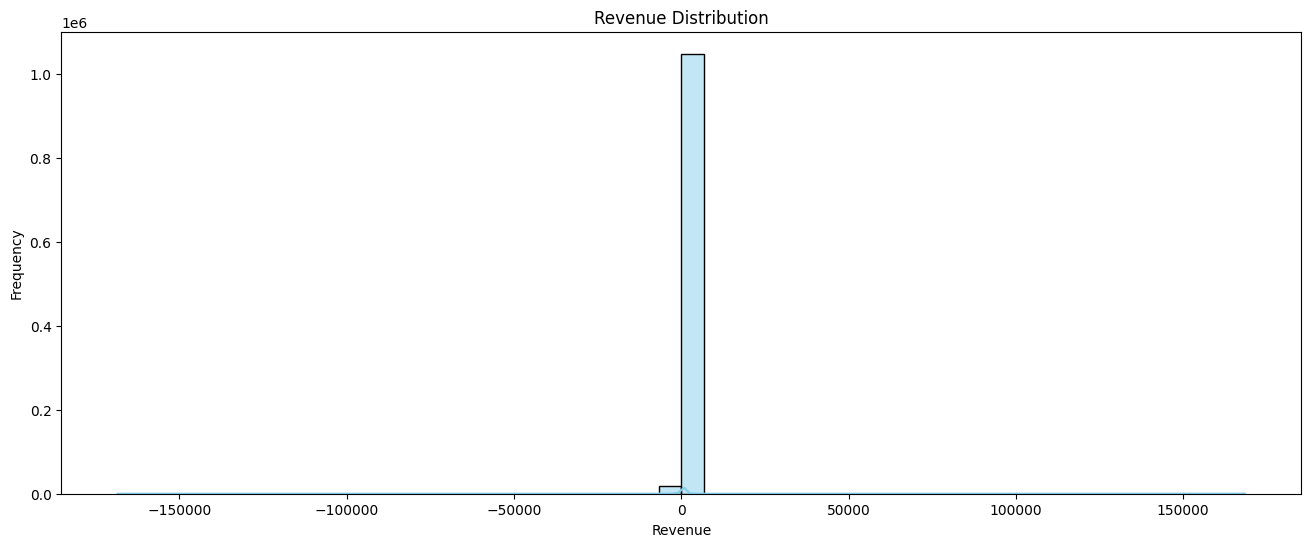

In [88]:
plt.figure(figsize=(16, 6))
sns.histplot(df['revenue'], bins=50, kde=True, color='skyblue')
plt.title('Revenue Distribution')
plt.xlabel('Revenue')
plt.ylabel('Frequency')
plt.show()

In [89]:
df[['revenue', 'quantity', 'price']].describe().T

,count,mean,std,min,25%,50%,75%,max
revenue,1067371.00,18.07,292.42,-168469.60,3.75,9.90,17.70,168469.60
quantity,1067371.00,9.94,172.71,-80995.00,1.00,3.00,10.00,80995.00
price,1067371.00,4.65,123.55,-53594.36,1.25,2.10,4.15,38970.00


In [90]:
# min and max revenue are extreme, we have some outliers
df[['revenue', 'quantity', 'price']].quantile([0.01, 0.25, 0.5, 0.75, 0.99, 1.0]).T


,0.01,0.25,0.50,0.75,0.99,1.00
revenue,-7.95,3.75,9.90,17.70,180.00,168469.60
quantity,-3.00,1.00,3.00,10.00,100.00,80995.00
price,0.21,1.25,2.10,4.15,18.00,38970.00


In [91]:
# drop extreme outliers for better visualization
q01 = df[['revenue','quantity','price']].quantile(0.01)
q99 = df[['revenue','quantity','price']].quantile(0.99)

df_clean = df[
    (df['revenue'].between(q01['revenue'], q99['revenue'])) &
    (df['quantity'].between(q01['quantity'], q99['quantity'])) &
    (df['price'].between(q01['price'], q99['price']))
]


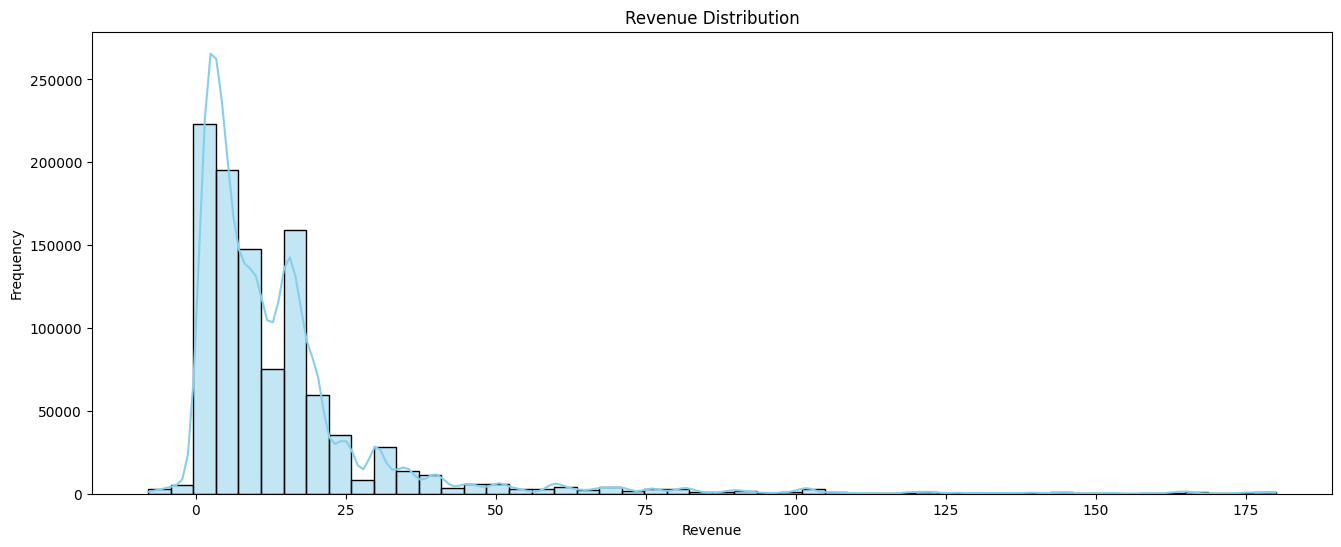

In [92]:
plt.figure(figsize=(16, 6))
sns.histplot(df_clean['revenue'], bins=50, kde=True, color='skyblue')
plt.title('Revenue Distribution')
plt.xlabel('Revenue')
plt.ylabel('Frequency')
plt.show()


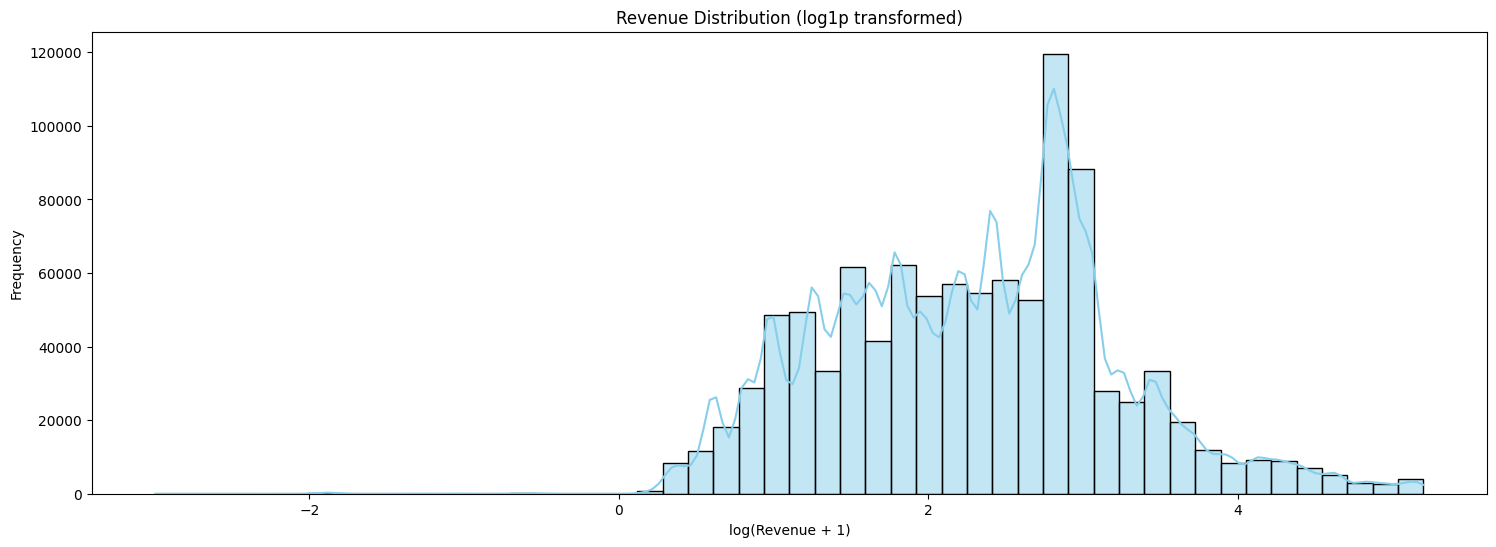

In [93]:

df_clean['log_revenue'] = np.log1p(df_clean['revenue'])

plt.figure(figsize=(18, 6))
sns.histplot(df_clean['log_revenue'], bins=50, kde=True, color='skyblue')
plt.title('Revenue Distribution (log1p transformed)')
plt.xlabel('log(Revenue + 1)')
plt.ylabel('Frequency')
plt.show()


In [97]:
month_order = [
    'January','February','March','April','May','June',
    'July','August','September','October','November','December'
]

df_clean['month'] = pd.Categorical(df_clean['month'], categories=month_order, ordered=True)

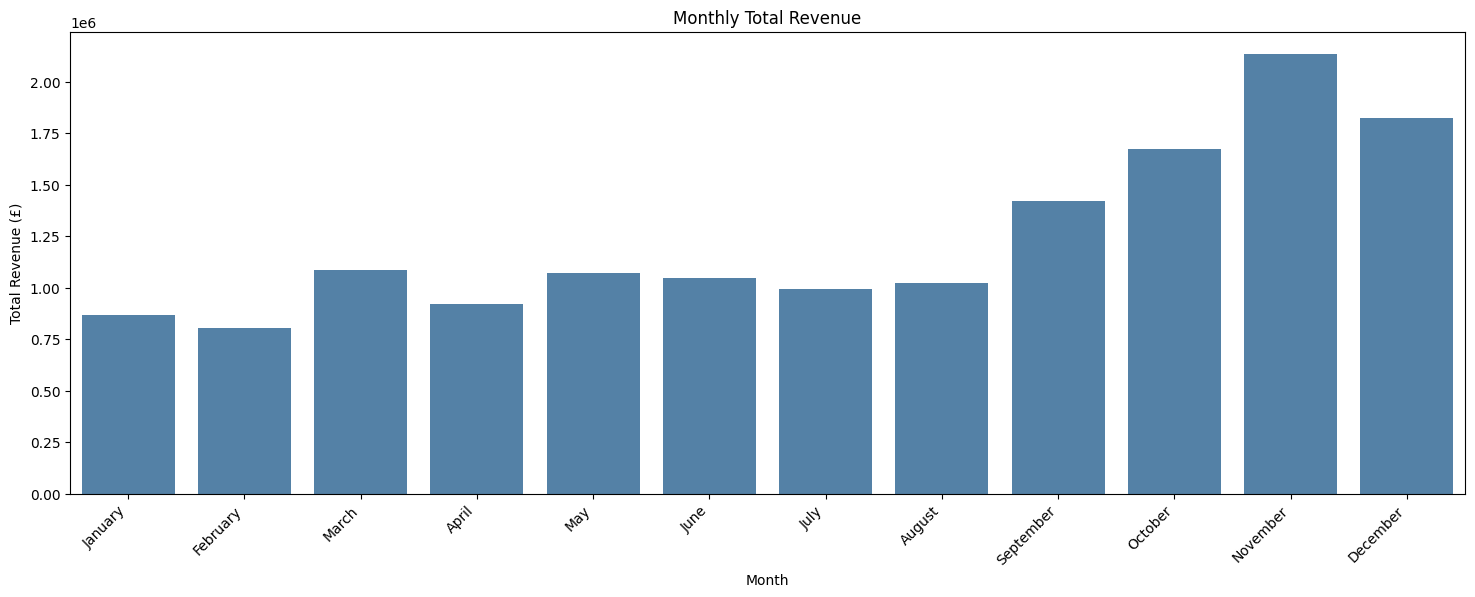

In [98]:
monthly_rev = df_clean.groupby('month', as_index=False)['revenue'].sum()

plt.figure(figsize=(18, 6))
sns.barplot(data=monthly_rev, x='month', y='revenue', color='steelblue')
plt.xticks(rotation=45, ha='right')
plt.title('Monthly Total Revenue')
plt.xlabel('Month')
plt.ylabel('Total Revenue (£)')
plt.show()


In [101]:
country_rev = (
    df_clean
    .groupby('country', as_index=False)['revenue']
    .sum()
    .sort_values('revenue', ascending=False)
    .head(10)
)


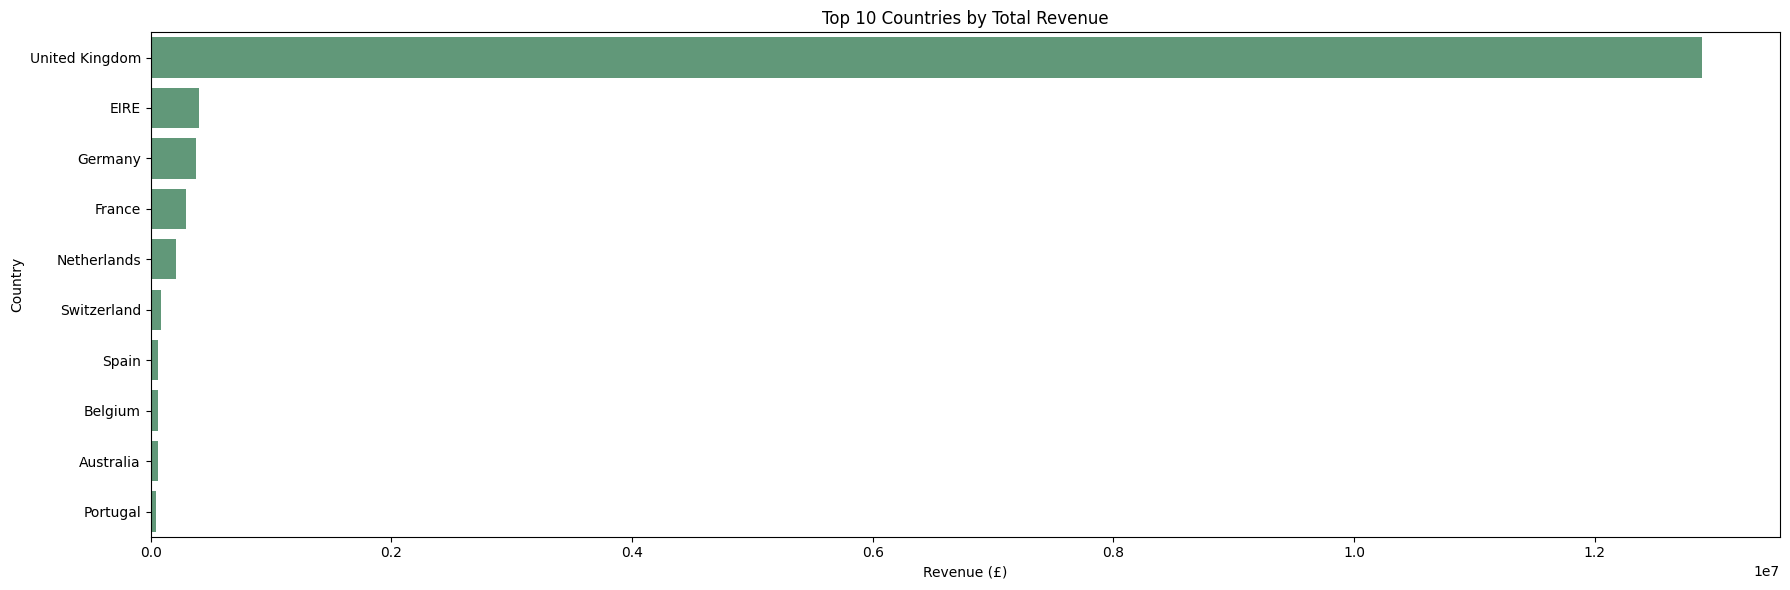

In [102]:
plt.figure(figsize=(18, 6))
sns.barplot(
    data=country_rev,
    x='revenue',
    y='country',
    color='seagreen',
    alpha=0.8
)
plt.title('Top 10 Countries by Total Revenue')
plt.xlabel('Revenue (£)')
plt.ylabel('Country')
plt.tight_layout()
plt.show()
